In [35]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import pandas as pd
import PIL.Image as Image
# from pyodide.http import open_url
# from js import console
# from mpl_toolkits.axes_grid1 import make_axes_locatable


In [36]:
imageData = pd.read_csv( "./ImageCsv/imgData.csv" ).to_numpy()[:,1:]


In [53]:
imageFeatures = pd.read_csv("./ImageFeatures/imgFeatures.csv" ).to_numpy()[:,1:]
imageFeatures = imageFeatures

print(imageData.shape)
print(imageFeatures.shape)

(15, 518400)
(15, 4)


In [51]:
countImg = len(imageData)

randIndexes = np.random.permutation(countImg)
randImages = [imageData[index].reshape( (360,360,4) ) for index in randIndexes]



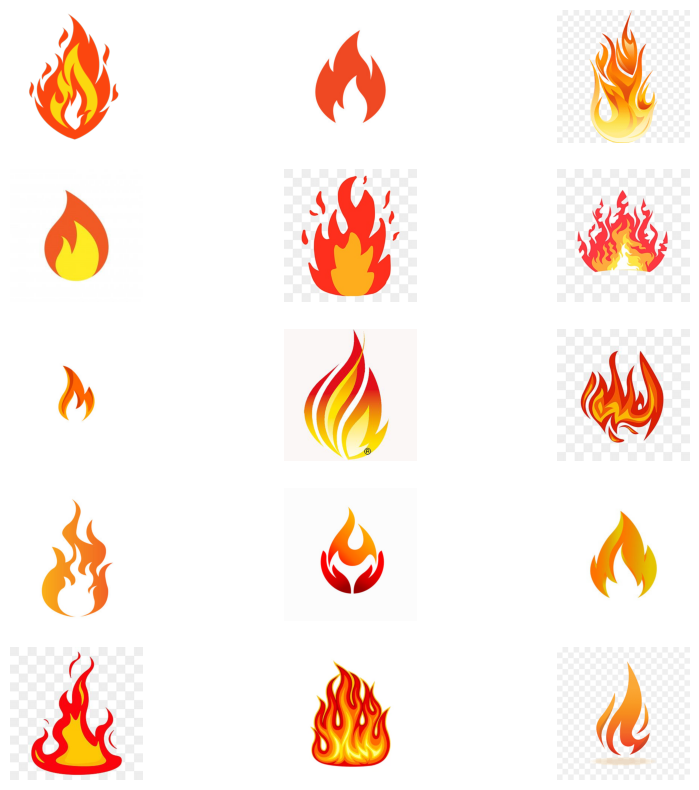

In [52]:
_, axes = plt.subplots(5, 3, figsize=(10, 10))

for key, value in zip(axes.flatten(), randImages):
    key.imshow(value)
    key.axis("off")

In [44]:
def euclidean_distance(v1, v2):
    return np.sqrt( np.sum(   (v1 - v2)**2   )   )

In [60]:
def predict(test_x):
    
    ## calculate distances between test_x and all dta samples in x
    ## this distances vector is a vector of 45 distances
    ## distances = [ euclidean_distance(test_x , x)  for x in X_train    ]

    distances = [ euclidean_distance(test_x, x )  for x in imageFeatures  ]
    
    ## distances - > [23, 3, 145, 17, ...]
    
    k = 3
    
    ## sort by distance value and return the k nearest neighbors
    ## np.argsort returns the indices of the k neares neighbors
    k_neighbor_indices = np.argsort(distances)[:k]
    print(k_neighbor_indices)
    
    
    ## with indices, extract labels from y_train 
    selected_imgs_to_avg = [ imageData[i].reshape((360,360,4))  for i in k_neighbor_indices  ]
    #print(selected_imgs_to_avg)

    return selected_imgs_to_avg

In [92]:
def generate_img_per_index(index):
    
    selected_imgs_to_avg = predict( imageFeatures[  index  ] )
    the_test_conditions = imageFeatures[  index  ]
    #print(np.array(selected_imgs_to_avg).shape)
    
    avg_gen_img = np.mean( np.array(selected_imgs_to_avg), axis=0 )
    
    avg_gen_img = avg_gen_img.astype(int)
    
    gen_pil_image = avg_gen_img
    
    real_my_img = np.array(imageData[index]).reshape((360,360,4))
    real_pil_image = Image.fromarray(real_my_img.reshape(-1,1), "RGBA")
        
    return the_test_conditions, gen_pil_image, real_my_img

[ 1 12  6]


Text(0.5, 1.0, 'real')

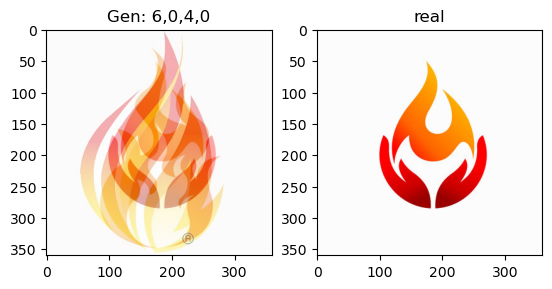

In [93]:
the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(1)

the_test_conditions = the_test_conditions.astype(int)
str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
str_conditions = str_conditions.replace(" ","")
str_conditions = str_conditions.replace("[","")
str_conditions = str_conditions.replace("]","")

## print(str_conditions)
                 

fig, ax = plt.subplots(1,2)

ax[0].imshow(gen_pil_image)
ax[1].imshow(real_pil_image)

ax[0].set_title("Gen: " + str_conditions)
ax[1].set_title("real")
